In [1]:
import os

import numpy as np
import pandas as pd
import tensorflow as tf

from energy_py import Runner
from energy_py.agents import DQN
from energy_py.envs import BatteryEnv

In [2]:
#  set random seeds for repeatability
np.random.seed(42)
tf.set_random_seed(42)

In [9]:
TOTAL_STEPS = 50000

agent_config = {'discount': 0.97,                 #  the discount rate
                'tau': 0.01,                     #  parameter that controls the copying of weights from online to target network
                'total_steps': TOTAL_STEPS,   
                'batch_size': 12,                 #  size of the minibatches used for learning
                'layers': (20, 20),               #  structure of the neural network used to approximate Q(s,a)
                'learning_rate': 0.01,          #  controls the stength of weight updates during learning       
                'epsilon_decay_fraction': 0.3,    #  a fraction as % of total steps where epsilon decayed from 1.0 to 0.1
                'memory_fraction': 0.9,           #  the size of the replay memory as a % of total steps
                'memory_type': 'deque',           #  the replay memory implementation we want
                'process_observation': 'standardizer',
                'process_target': 'normalizer'}    

#  we just need to let our env know where our state.csv and observation.csv are (data_path)
env = BatteryEnv(data_path=os.getcwd())

In [10]:
#  Runner is a class that helps us with experiments - tracking rewards, writing environment info to csv and managing TensorBoard
#  in this notebook we just use it to track rewards for us
runner = Runner()

#  initialize Tensorflow machinery
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    #  add the tf session and t-+he environment to the agent config dictionary
    #  and initialize the agent
    agent_config['sess'] = sess
    agent_config['env'] = env
    agent = DQN(**agent_config)
    
    #  initial values for the step and episode number
    step, episode = 0, 0

    #  outer while loop runs through multiple episodes
    while step < TOTAL_STEPS:
        episode += 1
        done = False
        observation = env.reset()
        
        while not done:
            step += 1
            action = agent.act(observation)
            
            next_observation, reward, done, info = env.step(action)
            
            #  store the experience
            agent.remember(observation, action, reward,
                           next_observation, done)
            
            #  moving to the next time step
            observation = next_observation
            #  saving the reward 
            runner.append(reward)
            
            #  we don't start learning until the memory is half full
            if step > int(agent.memory.size * 0.5):  #set threshold to start learning
                train_info = agent.learn()
        
        if episode % 5 == 0:
            print('progress - {:.1f}% - episode {:.0f} - run time {:.2f} - episode reward {:.2f} - avg rewards {:.2f}'.format(100*step/TOTAL_STEPS,
                                                                                                                              episode,
                                                                                                                              runner.calc_time(),
                                                                                                                              sum(runner.ep_rewards),
                                                                                                                              runner.avg_rew))
        #  the report method should be run at the end of each episode
        runner.report({'ep': episode,
                       'step': step})

copying ['hidden_layer_1', 'Variable:0'] to ['hidden_layer_1', 'Variable:0']
copying ['hidden_layer_1', 'Variable_1:0'] to ['hidden_layer_1', 'Variable_1:0']
copying ['input_layer', 'Variable:0'] to ['input_layer', 'Variable:0']
copying ['input_layer', 'Variable_1:0'] to ['input_layer', 'Variable_1:0']
copying ['output_layer', 'Variable:0'] to ['output_layer', 'Variable:0']
copying ['output_layer', 'Variable_1:0'] to ['output_layer', 'Variable_1:0']
copying ['hidden_layer_1', 'Variable:0'] to ['hidden_layer_1', 'Variable:0']
copying ['hidden_layer_1', 'Variable_1:0'] to ['hidden_layer_1', 'Variable_1:0']
copying ['input_layer', 'Variable:0'] to ['input_layer', 'Variable:0']
copying ['input_layer', 'Variable_1:0'] to ['input_layer', 'Variable_1:0']
copying ['output_layer', 'Variable:0'] to ['output_layer', 'Variable:0']
copying ['output_layer', 'Variable_1:0'] to ['output_layer', 'Variable_1:0']
copying ['hidden_layer_1', 'Variable:0'] to ['hidden_layer_1', 'Variable:0']
copying ['hidde

progress - 36.7% - episode 390 - run time 1.62 - episode reward -5.51 - avg rewards -5.31
progress - 37.1% - episode 395 - run time 1.68 - episode reward -4.57 - avg rewards -5.37
progress - 37.6% - episode 400 - run time 1.74 - episode reward -5.60 - avg rewards -5.41
progress - 38.1% - episode 405 - run time 1.79 - episode reward -6.34 - avg rewards -5.48
progress - 38.5% - episode 410 - run time 1.82 - episode reward -7.30 - avg rewards -5.45
progress - 39.0% - episode 415 - run time 1.88 - episode reward -7.22 - avg rewards -5.44
progress - 39.5% - episode 420 - run time 1.94 - episode reward -6.25 - avg rewards -5.64
progress - 40.0% - episode 425 - run time 2.00 - episode reward -6.25 - avg rewards -5.66
progress - 40.4% - episode 430 - run time 2.05 - episode reward -5.82 - avg rewards -5.62
progress - 40.9% - episode 435 - run time 2.09 - episode reward -2.10 - avg rewards -5.64
progress - 41.4% - episode 440 - run time 2.15 - episode reward -6.00 - avg rewards -5.70
progress -

progress - 79.9% - episode 850 - run time 7.38 - episode reward 4.44 - avg rewards -6.29
progress - 80.4% - episode 855 - run time 7.45 - episode reward 0.03 - avg rewards -5.91
progress - 80.8% - episode 860 - run time 7.52 - episode reward -7.93 - avg rewards -5.22
progress - 81.3% - episode 865 - run time 7.58 - episode reward -12.56 - avg rewards -5.47
progress - 81.8% - episode 870 - run time 7.65 - episode reward -2.10 - avg rewards -5.63
progress - 82.2% - episode 875 - run time 7.72 - episode reward -7.67 - avg rewards -5.64
progress - 82.7% - episode 880 - run time 7.78 - episode reward -4.89 - avg rewards -5.80
progress - 83.2% - episode 885 - run time 7.85 - episode reward -8.10 - avg rewards -5.62
progress - 83.7% - episode 890 - run time 7.91 - episode reward 0.52 - avg rewards -5.77
progress - 84.1% - episode 895 - run time 7.98 - episode reward 0.67 - avg rewards -6.30
progress - 84.6% - episode 900 - run time 8.05 - episode reward -0.14 - avg rewards -6.17
progress - 85

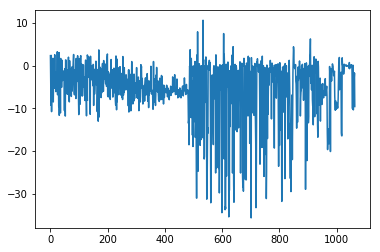

In [11]:
#  plot rewards

import matplotlib.pyplot as plt

episode_rewards = runner.global_rewards
plt.plot(episode_rewards)

In [12]:
#  we can also look at what happened in our last episode
ep_hist = pd.DataFrame.from_dict(info)
fd = pd.DataFrame.from_dict(info)

fd.columns = ['action','done','cpu_utilization','gross_rate','losses','net_stored','new_rate','next_observation','next_state','observation','old_rate','reward','state','steps']
fd =fd.drop('done',1)
#fd.columns = ['action', 'done','cpu_util']
fd.head()
#print(fd['done'],fd['action'])
#ep_hist.head()

,action,cpu_utilization,gross_rate,losses,net_stored,new_rate,next_observation,next_state,observation,old_rate,reward,state,steps
0,"[1.894736842105263, 1.3684210526315788]",0.0,0.526316,0.004386,0.039474,0.039474,"[[50.0, 50.0, 50.0, 100.0, 100.0, 1.0, 1.0, 0....","[[2.0, 0.03947368421052632]]","[[50.0, 50.0, 50.0, 50.0, 100.0, 0.0, 1.0, 0.0]]",0.000000,-0.000000,"[[0.0, 0.0]]",1
1,"[1.894736842105263, 1.3684210526315788]",2.0,0.526316,0.004386,0.039474,0.078947,"[[50.0, 50.0, 100.0, 100.0, 100.0, 2.0, 1.0, 0...","[[3.0, 0.07894736842105264]]","[[50.0, 50.0, 50.0, 100.0, 100.0, 1.0, 1.0, 0....",0.039474,-0.087719,"[[2.0, 0.03947368421052632]]",2
2,"[1.894736842105263, 1.3684210526315788]",3.0,0.526316,0.004386,0.039474,0.118421,"[[50.0, 100.0, 100.0, 100.0, 100.0, 3.0, 1.0, ...","[[4.0, 0.11842105263157897]]","[[50.0, 50.0, 100.0, 100.0, 100.0, 2.0, 1.0, 0...",0.078947,-0.131579,"[[3.0, 0.07894736842105264]]",3
3,"[1.894736842105263, 1.3684210526315788]",4.0,0.526316,0.004386,0.039474,0.157895,"[[100.0, 100.0, 100.0, 100.0, 100.0, 4.0, 1.0,...","[[6.0, 0.1578947368421053]]","[[50.0, 100.0, 100.0, 100.0, 100.0, 3.0, 1.0, ...",0.118421,-0.175439,"[[4.0, 0.11842105263157897]]",4
4,"[1.894736842105263, 1.3684210526315788]",6.0,0.526316,0.004386,0.039474,0.197368,"[[100.0, 100.0, 100.0, 100.0, -50.0, 5.0, 1.0,...","[[8.0, 0.19736842105263164]]","[[100.0, 100.0, 100.0, 100.0, 100.0, 4.0, 1.0,...",0.157895,-0.263158,"[[6.0, 0.1578947368421053]]",5


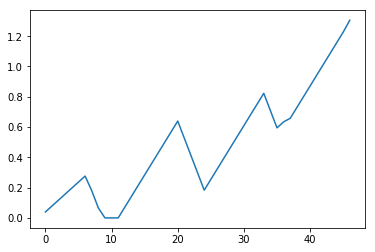

In [13]:
#plt.plot(ep_hist.loc[:, 'new_charge'])
plt.plot(fd.loc[:, 'new_rate'])


Loss function


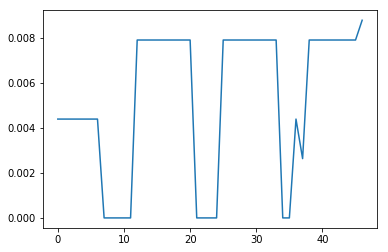

In [14]:
print('Loss function')
plt.plot(fd.loc[:, 'losses'])

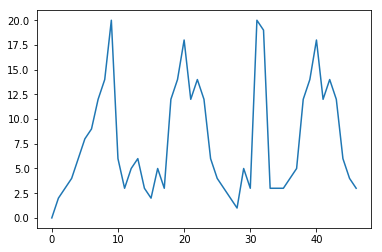

In [15]:
#plt.plot(ep_hist.loc[:, 'electricity_price'])
plt.plot(fd.loc[:, 'cpu_utilization'])

In [16]:
ep_hist.loc[:, 'reward'].sum()

-9.570175438596491

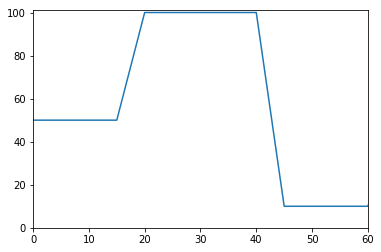

,Time,CPU
0,0,50
1,5,50
2,10,50
3,15,50
4,20,100


In [17]:
df1=pd.read_excel('C:\\Users\\DELL\\Anaconda3\\cloud17april\\state1.xlsx')
plt.plot(df1['Time'],df1['CPU'])
ax=plt.gca()
ax.set_ylim([0,101])
ax.set_xlim([0,60])
plt.show()
df1.head()